In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
dataset = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(dataset.shape, ' ', test.shape)

(891, 12)   (418, 11)


In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature Engineering

In [6]:
def count_null(data):
    feature_with_null = []
    for feature in data.columns:
        if data[feature].isnull().mean()*100 > 0.0:
            feature_with_null.append(feature) 
    print(feature , data[feature].isnull().mean()*100, '%', 'of null values')
    return feature_with_null;



# for feature in dataset.columns:
#     if dataset[feature].isnull().mean()*100 > 0.0:
#         feature_with_null.append(feature) 
#     print(feature , dataset[feature].isnull().mean()*100, '%', 'of null values')

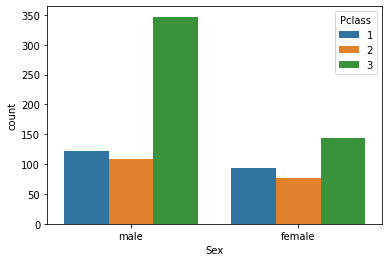

In [7]:
sns.countplot(x='Sex', hue="Pclass" , data=dataset)

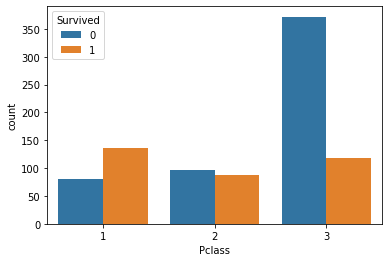

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=dataset)

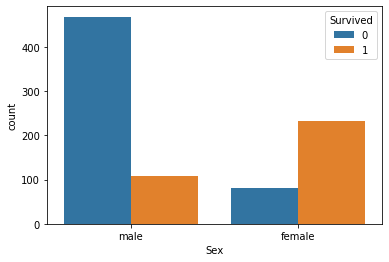

In [9]:
sns.countplot(x="Sex", hue="Survived", data=dataset)

In [10]:
categorical_features = [feature for feature in dataset.columns if  dataset[feature].dtypes == 'O' ]

In [11]:
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [12]:
# feature_with_null

In [13]:
# sns.pairplot(dataset)

In [14]:
dataset['Age'].min()

0.42

In [15]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [16]:
print(dataset.shape,' ', test.shape)

(891, 12)   (418, 11)


In [17]:
dataset['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [18]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
aged_1to20=dataset[(dataset['Age']<=20)]
aged_20to40=dataset[(dataset['Age']>20) & (dataset['Age']<=40)]
aged_40to60=dataset[(dataset['Age']>40) & (dataset['Age']<=60)]
aged_60to80=dataset[(dataset['Age']>60)]


aged_1to20_test=test[(test['Age']<=20)]
aged_20to40_test=test[(test['Age']>20) & (test['Age']<=40)]
aged_40to60_test=test[(test['Age']>40) & (test['Age']<=60)]
aged_60to80_test=test[(test['Age']>60)]

In [20]:
aged_1to20['Age']=0
aged_20to40['Age']=1
aged_40to60['Age']=2
aged_60to80['Age']=3

aged_1to20_test['Age']=0
aged_20to40_test['Age']=1
aged_40to60_test['Age']=2
aged_60to80_test['Age']=3




dataset = pd.concat([aged_1to20,aged_20to40,aged_40to60,aged_60to80], axis=0).sort_values(by='PassengerId')
test = pd.concat([aged_1to20_test,aged_20to40_test,aged_40to60_test,aged_60to80_test], axis=0).sort_values(by='PassengerId')

C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [21]:
print(dataset.shape,' ', test.shape)

(891, 12)   (418, 11)


In [22]:
dataset['Age'].unique()

array([1, 2, 0, 3], dtype=int64)

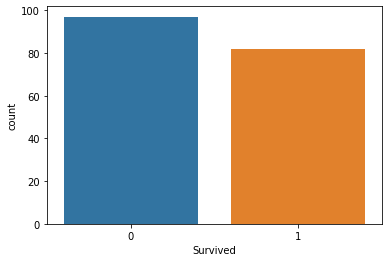

In [23]:
sns.countplot(x='Survived', data=aged_1to20)

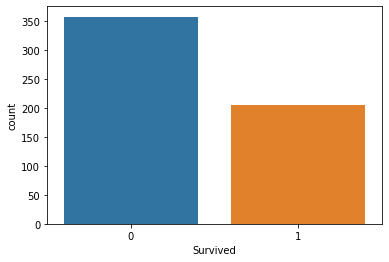

In [24]:
sns.countplot(x='Survived', data=aged_20to40)

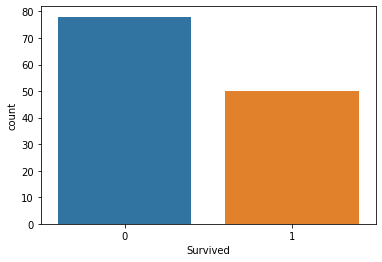

In [25]:
sns.countplot(x='Survived', data=aged_40to60)

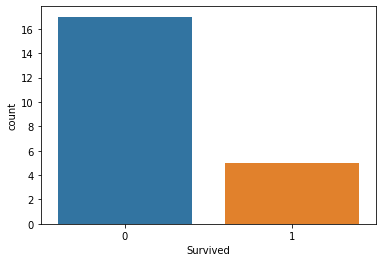

In [26]:
sns.countplot(x='Survived', data=aged_60to80)

In [27]:
# dataset[feature_with_null]

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

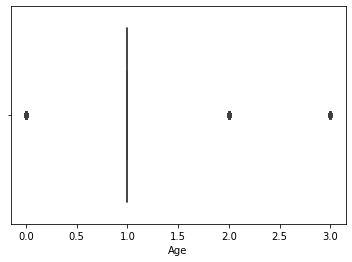

In [29]:
sns.boxplot(x='Age', data=dataset)

In [30]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [31]:
dataset['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [32]:
dataset['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C128           1
B102           1
B39            1
D47            1
B73            1
Name: Cabin, Length: 147, dtype: int64

In [33]:
dataset['Cabin'] = dataset['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [34]:
cabin_mapping={'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [35]:
dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
test['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform("median"), inplace=True)

In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,1,0,0,330911,7.8292,5.0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,363272,7.0000,2.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,9.6875,5.0,Q
3,895,3,"Wirz, Mr. Albert",male,1,0,0,315154,8.6625,2.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,12.2875,5.0,S


In [37]:
dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
test['FamilySize'] = test['SibSp']+dataset['Parch']+1

In [38]:
dataset['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [39]:
family_mapping={1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9, 11:10}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
test['FamilySize'] = test['FamilySize'].map(family_mapping)

In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,1,0,0,330911,7.8292,5.0,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,363272,7.0000,2.0,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,9.6875,5.0,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,1,0,0,315154,8.6625,2.0,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,12.2875,5.0,S,1.0


In [41]:
dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title']=test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [42]:
dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [43]:
# dataset['Title'].map(title_mapping)

In [44]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 5, "Col": 6, "Major": 6, "Mlle": 6,"Countess": 6,
                 "Ms": 6, "Lady": 6, "Jonkheer": 6, "Don": 6, "Dona" : 6, "Mme": 6,"Capt": 6,"Sir":6 }
dataset['Title'] = dataset['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [45]:
# dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
#  	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

#     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
#     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
#     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

dataset[['Title', 'Survived']].groupby('Title').count()
#dataset['Title']


,Survived
Title,
0,517
1,182
2,125
3,40
4,7
5,6
6,14


In [46]:
test['Title']

0      0
1      2
2      0
3      0
4      2
      ..
413    0
414    6
415    0
416    0
417    3
Name: Title, Length: 418, dtype: int64

In [47]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,5.0,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,PC 17599,71.2833,2.0,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,5.0,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,113803,53.1000,2.0,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,1,0,0,373450,8.0500,5.0,S,0,0


In [48]:
dataset.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1, inplace = True)
test.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1, inplace = True)

In [49]:
dataset['FamilySize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [50]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,1,7.2500,S,1,0
1,2,1,1,female,1,71.2833,C,1,2
2,3,1,3,female,1,7.9250,S,0,1
3,4,1,1,female,1,53.1000,S,1,2
4,5,0,3,male,1,8.0500,S,0,0


In [51]:
count_null(dataset)

Title 0.0 % of null values


[]

In [52]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
Title          0
dtype: int64

In [53]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
FamilySize     1
Title          0
dtype: int64

In [54]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test['FamilySize'].fillna(test['FamilySize'].median(), inplace=True)

In [55]:
dataset['IsAlone'] = 0
dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

dataset.drop(['FamilySize'], axis=1, inplace = True)
test.drop(['FamilySize'], axis=1, inplace = True)

In [56]:
dataset['Fare_split']= pd.qcut(dataset['Fare'],4)
dataset[['Fare_split', 'Survived']].groupby('Fare_split').mean()

test['Fare_split']= pd.qcut(test['Fare'],4)


In [57]:
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
dataset['Fare'] = dataset['Fare'].astype(int)

test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

In [58]:
dataset.drop(['Fare_split'], axis=1, inplace = True)
test.drop(['Fare_split'], axis=1, inplace = True)

In [59]:
count_null(test)

IsAlone 0.0 % of null values


[]

In [60]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,male,1,0,S,0,1
1,2,1,1,female,1,3,C,2,1
2,3,1,3,female,1,1,S,1,0
3,4,1,1,female,1,3,S,2,1
4,5,0,3,male,1,1,S,0,0


In [61]:
dataset['Sex']=pd.get_dummies(dataset['Sex'], drop_first=True)
test['Sex']=pd.get_dummies(test['Sex'], drop_first=True)

In [62]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,1,0,S,0,1
1,2,1,1,0,1,3,C,2,1
2,3,1,3,0,1,1,S,1,0
3,4,1,1,0,1,3,S,2,1
4,5,0,3,1,1,1,S,0,0


In [63]:
dataset['Embarked']=pd.get_dummies(dataset['Sex'], drop_first=True)
test['Embarked']=pd.get_dummies(test['Sex'], drop_first=True)

In [64]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,1,0,1,0,1
1,2,1,1,0,1,3,0,2,1
2,3,1,3,0,1,1,0,1,0
3,4,1,1,0,1,3,0,2,1
4,5,0,3,1,1,1,1,0,0


In [65]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,1,0,1,0,1
1,893,3,0,2,0,0,2,1
2,894,2,1,3,1,1,0,0
3,895,3,1,1,1,1,0,1
4,896,3,0,1,1,0,2,0


In [66]:
x=dataset.drop('Survived', axis=1)
y=dataset['Survived']

In [67]:
x.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,3,1,1,0,1,0,1
1,2,1,0,1,3,0,2,1
2,3,3,0,1,1,0,1,0
3,4,1,0,1,3,0,2,1
4,5,3,1,1,1,1,0,0


In [68]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
print(dataset.shape, ' ' , test.shape)

(891, 9)   (418, 8)


In [70]:
dataset.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,1,0,1,0,1
1,2,1,1,0,1,3,0,2,1
2,3,1,3,0,1,1,0,1,0
3,4,1,1,0,1,3,0,2,1
4,5,0,3,1,1,1,1,0,0
5,6,0,3,1,1,1,1,0,0
6,7,0,1,1,2,3,1,0,0
7,8,0,3,1,0,2,1,3,0
8,9,1,3,0,1,1,0,2,0
9,10,1,2,0,0,2,0,2,1


In [71]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,1,0,1,0,1
1,893,3,0,2,0,0,2,1
2,894,2,1,3,1,1,0,0
3,895,3,1,1,1,1,0,1
4,896,3,0,1,1,0,2,0
5,897,3,1,0,1,1,0,0
6,898,3,0,1,0,0,1,0
7,899,2,1,1,2,1,0,0
8,900,3,0,0,0,0,2,0
9,901,3,1,1,2,1,0,1


## Modelling

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### Cross Validation

In [73]:
from sklearn.model_selection import KFold;
from sklearn.model_selection import cross_val_score;
k_fold = KFold(n_splits=20, shuffle=True, random_state=0)

### KNN

In [74]:
clf= KNeighborsClassifier()
scoring="accuracy"
score=cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score))

0.587003745318352


### Decision Tree

In [75]:
clf= DecisionTreeClassifier()
scoring="accuracy"
score=cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score))

0.7385393258426965


### Random Forest

In [76]:
clf= RandomForestClassifier()
scoring="accuracy"
score=cross_val_score(clf, x, y, cv=k_fold, n_jobs=1)
print(np.mean(score))

C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.7766292134831462


C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

### Naive Bayes

In [77]:
clf= GaussianNB()
scoring="accuracy"
score=cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score))

0.77103620474407


### SVM

In [78]:
clf= SVC()
scoring="accuracy"
score=cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score))

C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\s

0.6218352059925094


In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
#random state
random_state = [int(x) for x in np.linspace(10, 100, num = 10)]

In [81]:
[int(x) for x in np.linspace(10, 100, num = 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [82]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'random_state': random_state
}

In [83]:
random = RandomForestClassifier()

In [84]:
rf_random = RandomizedSearchCV(estimator=random, param_distributions=random_grid, scoring = 'neg_mean_squared_error', n_iter=10, cv = 5, verbose = 2, random_state=42, n_jobs = 1)

In [86]:
rf_random.fit(x, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.3s
[CV] random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.4s
[CV] random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.4s
[CV] random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.3s
[CV] random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  random_state=50, n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.4s
[CV] random_state=60, n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  random_s

[CV]  random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.7s
[CV] random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.8s
[CV] random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.7s
[CV] random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.7s
[CV] random_state=90, n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  random

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.2s finished
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [87]:
prediction=rf_random.predict(test)

In [88]:
prediction = pd.DataFrame(prediction)
sub_df = pd.read_csv('Dataset/gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],prediction],axis=1)
datasets.columns=['PassengerId', 'Survived']
datasets.to_csv('gender_submission.csv', index=False)